In [91]:
import pandas as pd
import numpy as num
import matplotlib as mat
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram


# Introduction

I want to figure out what makes a song good. Spotify has a daily playlist that adds the 200 most popular songs in the world. 

# Data Cleaning

Since the Original Dataset was too large to upload to Github, the data will first be cleaned and saved as a separate file to reduce the size. Since the original Dataset is not present in the repository. The steps I took to clean the data will be commented out as they are working with a "non-existent" file. The Original Dataset is taken from [Kaggle](https://www.kaggle.com/datasets/brunoalarcon123/top-200-spotify-songs-dataset).

In [92]:
#Read the Original Dataset to see what kind of Data we are working with
#df = pd.read_csv('Spotify_Dataset_V3.csv', delimiter=';')


#Drop Unneeded Columns and Rows
#df = df.drop(columns=['id', 'Song URL', '# of Artist'])


#Remove Duplicate Occurrences
#df = df.drop_duplicates(subset='Title')


#Remove all Data before 2019


#Save filtered Dataset
#df.to_csv('Top200Data.csv', index=False)

In [93]:
#Read Filtered Data
#Our Filtered Data now contains all the songs that have ever made the Spotify Top 200 Daily Songs playlist from 2017
df = pd.read_csv('Top200Data.csv')
df = df.drop('# of Nationality', axis=1)

df.head(n=20)

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Artist (Ind.),Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat)
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.00,0.033,0.483,0.000,0.834,Eslabon Armado,Mexico,Latin-America,200,100.0
1,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.00,0.061,0.143,0.629,0.234,Bad Bunny,Puerto Rico,Latin-America,199,199.0
2,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.00,0.333,0.213,0.000,0.559,Yng Lvcas,Mexico,Latin-America,198,99.0
3,4,Cupid - Twin Ver.,FIFTY FIFTY,29/05/2023,0.783,0.592,-8332.00,0.033,0.435,0.000,0.726,FIFTY FIFTY,South Korea,Asia,197,197.0
4,5,un x100to,"Grupo Frontera, Bad Bunny",29/05/2023,0.569,0.724,-4076.00,0.047,0.228,0.000,0.562,Grupo Frontera,Mexico,Latin-America,196,98.0
5,6,Flowers,Miley Cyrus,29/05/2023,0.707,0.681,-4325.00,0.067,0.063,0.000,0.646,Miley Cyrus,United States,Anglo-America,195,195.0
6,7,Daylight,David Kushner,29/05/2023,0.508,0.430,-9475.00,0.034,0.830,0.000,0.324,David Kushner,United States,Anglo-America,194,194.0
7,8,Kill Bill,SZA,29/05/2023,0.644,0.735,-5747.00,0.039,0.052,0.144,0.418,SZA,United States,Anglo-America,193,193.0
8,9,As It Was,Harry Styles,29/05/2023,0.520,0.731,-5338.00,0.056,0.342,0.001,0.662,Harry Styles,United Kingdom,Europe,192,192.0
9,10,TQG,"KAROL G, Shakira",29/05/2023,0.720,0.630,-3547.00,0.277,0.673,0.000,0.607,KAROL G,Colombia,Latin-America,191,95.5


<Axes: >

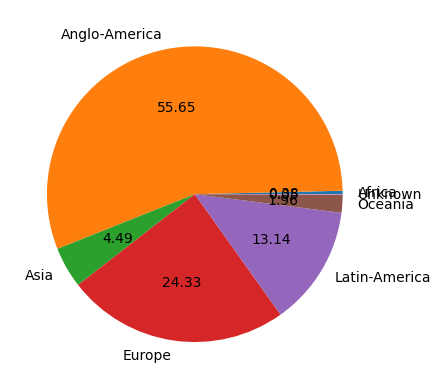

In [94]:
df.head(n = 20)


df.groupby('Continent').size().plot(kind='pie', autopct='%.2f')

# Agglomerative Hierarchy Clustering Algorithm

## Choosing the amount of clusters

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

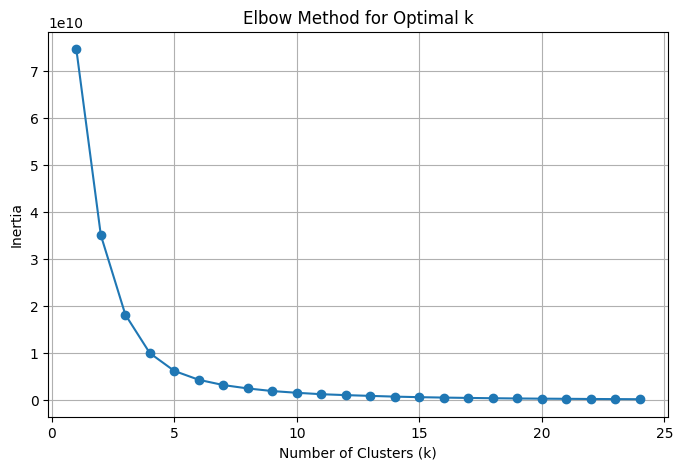

In [95]:
# Select the features for clustering (excluding non-essential columns like 'Title' and 'Artists')
selected_features = df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']]

# Create an empty list to store the inertias
inertias = []

# Define a range of k values (number of clusters) to try
k_values = range(1, 25)

# Calculate the inertia (within-cluster sum of squares) for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_features)
    inertias.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

We will choose k = 5

Agglomerative Clustering Algorithm

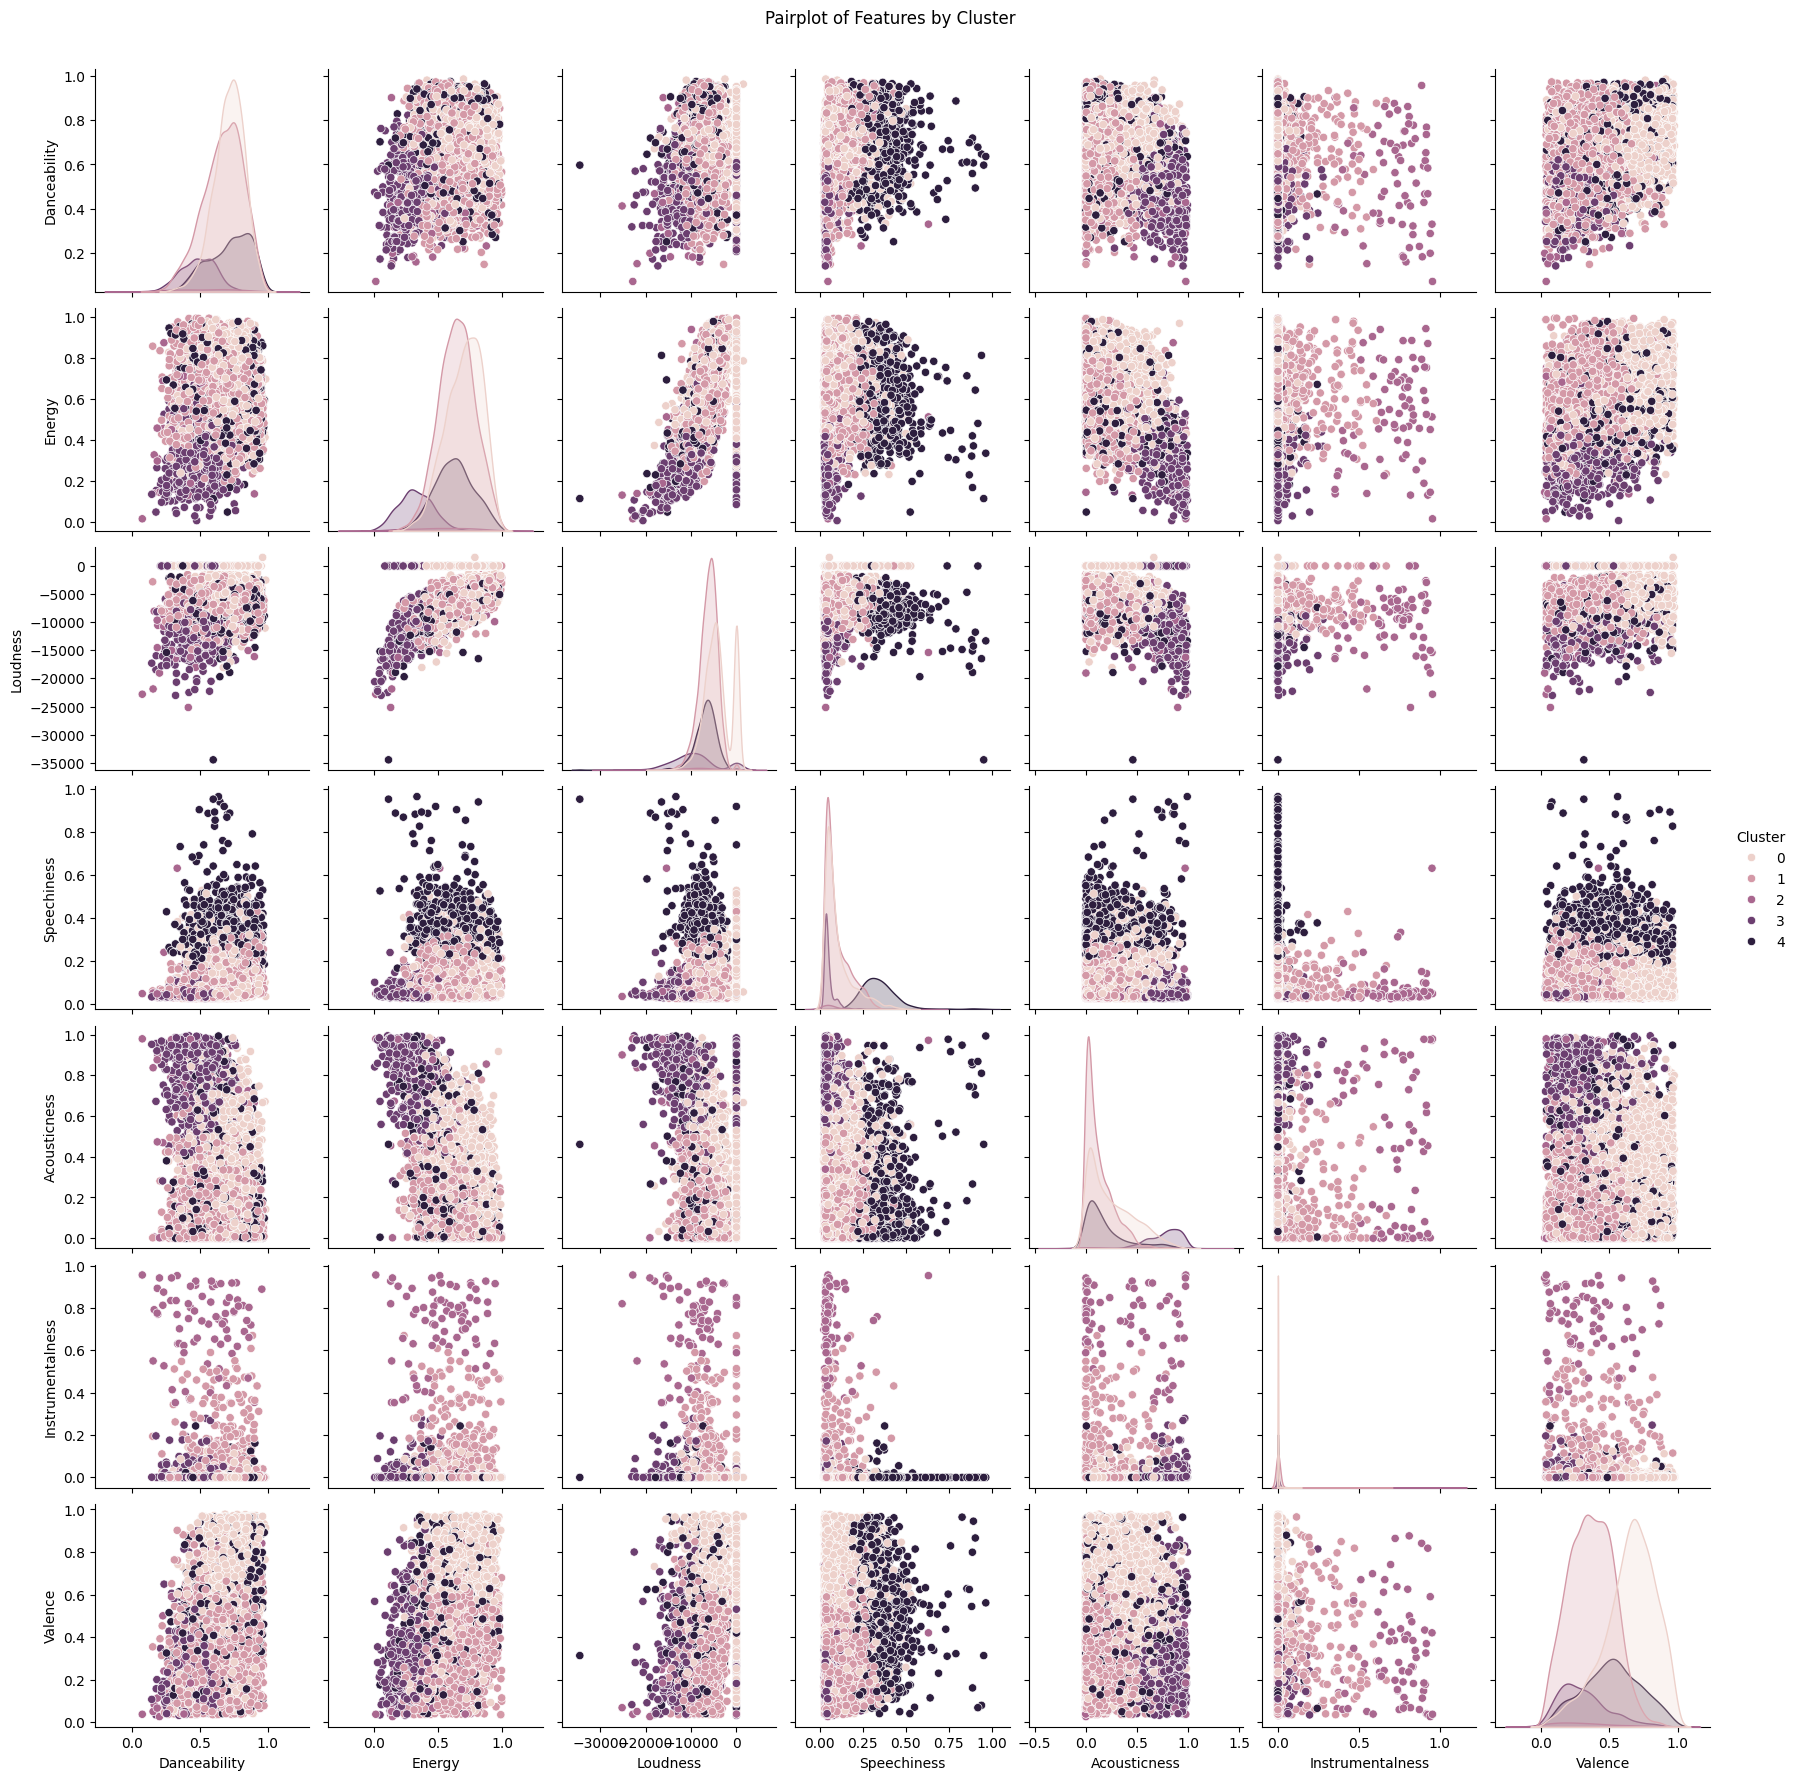

In [96]:
# Standardize the selected features (important for agglomerative clustering)
scaler = sk.preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# Perform Agglomerative Clustering with k=5
agglomerative_clustering = AgglomerativeClustering(n_clusters=5)
agglomerative_labels = agglomerative_clustering.fit_predict(scaled_features)
df['Cluster'] = agglomerative_labels

# Create a pairplot of selected features
sns.pairplot(df, hue='Cluster', vars=selected_features)
plt.suptitle('Pairplot of Features by Cluster', y=1.02)
plt.show()


# Dendrogram

In [101]:
# Perform hierarchical clustering
df.head(n = 10)

ndf = df.drop(['Rank', 'Title', 'Artists', 'Date', 'Artist (Ind.)', 'Nationality', 'Continent', 'Points (Total)', 'Points (Ind for each Artist/Nat)', 'Cluster'], axis=1)

# Perform hierarchical clustering
linkage_matrix = linkage(ndf, method='ward', metric='euclidean')

# Create the dendrogram
dendrogram(linkage_matrix)

# Customize the plot (optional)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
